In [1]:
#Set up dependencies
from splinter import Browser
from bs4 import BeautifulSoup as bs
import pandas as pd


## NASA Mars News

Scrape the NASA Mars News Site and collect the latest News Title and Paragraph Text.

In [2]:
# Setting up path for Browser splinter
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

<html class="no-flash cookies geolocation svg picture canvas video webgl srcdoc supports hiddenscroll no-touchevents fullscreen flexbox cssanimations flexboxlegacy no-flexboxtweener csstransforms csstransforms3d csstransitions preserve3d -webkit-" lang="en" style="--vh:611px;" xml:lang="en" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5eb902ba0a9a3986&amp;bkl=0&amp;bl=1&amp;pdt=189&amp;sid=5eb902ba0a9a3986&amp;pub=ra-5a690e4c1320e328&amp;rev=v8.28.3-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=mars.nasa.gov&amp;fp=news%2F&amp;fr=&amp;of=1&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&amp;ct=1&amp;tct=0&amp;abt=0&amp;cdn=0&amp;pi=1&amp;rb=0&amp;gen=100&amp;chr=UTF-8&amp;mk=Mars%2Cmissions%2CNASA%2Crover%2CCuriosity%2COpportunity%2CInSight%2CMars%20Reconnaissance%20Orbiter%2Cfacts&amp;colc=1589183162676&amp;jsl=1&amp;skipb=1&amp;callback=addthis.cbs.jsonp__314224197554347830" type="text/javascript">
  </script>
  <script src
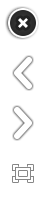
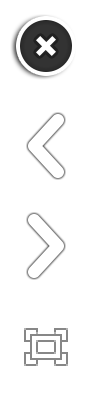
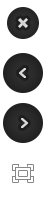
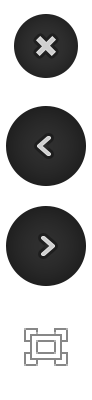
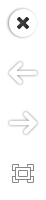
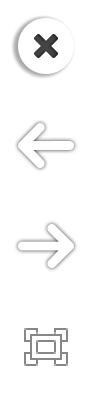
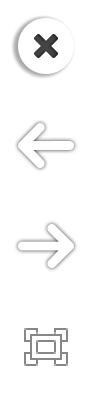

In [3]:
# Visting url througher splinter browser
url = 'https://mars.nasa.gov/news/'
browser.visit(url)

# Using Beatiful soup to parse the html in the designated url
html = browser.html
soup = bs(html, "html.parser")
print(soup.prettify())

In [4]:
# Get the date, title, and content text in the latest news
news_date = soup.find('div', class_='list_date').text
news_title = soup.find('div', class_='content_title').text
news_p = soup.find('div', class_='article_teaser_body').text


print(f'news_date = {news_date}')
print(f'news_title = {news_title}')
print (f'news_p = {news_p}')
print (' ')

news_date = May  7, 2020
news_title = Mars Now
news_p = Stacking spacecraft components on top of each other is one of the final assembly steps before a mission launches to the Red Planet. 
 


In [5]:
# Close the browser after scraping
browser.quit()

## JPL Mars Space Images - Featured Image

Use splinter to navigate the site and find the image url for the current Featured Mars Image

In [6]:
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [7]:
# Visting url througher splinter browser
url = 'https://www.jpl.nasa.gov/spaceimages/?search=&category=Mars'
browser.visit(url)

# Using Beatiful soup to parse the html in the designated url
html = browser.html
soup = bs(html, "html.parser")
print(soup.prettify())

<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers applicationcache svg inlinesvg smil svgclippaths -webkit-" style="">
 <!-- START HEADER: "DEFAULT" -->
 <!-- Google Tag Manager -->
 <head>
  <script async="" src="https://www.google-analytics.com/analytics.js" type="text/javascript">
  </script>
  <script src="https://m.addthis.com/live/red_lojson/300lo.json?si=5eb902be4abf8ea7&amp;bkl=0&amp;bl=1&amp;pdt=671&amp;sid=5eb902be4abf8ea7&amp;pub=&amp;rev=v8.28.3-wp&amp;ln=en&amp;pc=men&amp;cb=0&amp;ab=-&amp;dp=www.jpl.nasa.gov&amp;fp=spaceimages%2F%3Fsearch%3D%26category%3DMars&amp;fr=&amp;of=1&amp;pd=0&amp;irt=0&amp;vcl=0&amp;md=0&a

In [8]:
# Get the image url for the JPL Deatures space image
featured_image_tag = soup.find('article', class_='carousel_item')['style']
featured_image_url = featured_image_tag.split("url")[1]
featured_image_url = featured_image_url.split("'")[1]
featured_image_url = ('https://www.jpl.nasa.gov' + str(featured_image_url))

print(f'featured_image_url = {featured_image_url}')


featured_image_url = https://www.jpl.nasa.gov/spaceimages/images/wallpaper/PIA18826-1920x1200.jpg


In [9]:
# Close the browser after scraping
browser.quit()

## Mars Weather

Scrape the latest Mars weather tweet from the Mars Weather twitter account

In [10]:
# Setting up path for Browser splinter
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

In [11]:
# Visting url througher splinter browser
url = 'https://twitter.com/MarsWxReport?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor'
browser.visit(url)

In [12]:

# Using Beatiful soup to parse the html in the designated url
html = browser.html
soup = bs(html, "html5")
print(soup.prettify())

<html dir="ltr" lang="en" style="font-size: 15px;">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,maximum-scale=1,user-scalable=0,viewport-fit=cover" name="viewport"/>
  <link href="//abs.twimg.com" rel="preconnect"/>
  <link href="//api.twitter.com" rel="preconnect"/>
  <link href="//pbs.twimg.com" rel="preconnect"/>
  <link href="//t.co" rel="preconnect"/>
  <link href="//video.twimg.com" rel="preconnect"/>
  <link href="//abs.twimg.com" rel="dns-prefetch"/>
  <link href="//api.twitter.com" rel="dns-prefetch"/>
  <link href="//pbs.twimg.com" rel="dns-prefetch"/>
  <link href="//t.co" rel="dns-prefetch"/>
  <link href="//video.twimg.com" rel="dns-prefetch"/>
  <link as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/web/polyfills.6cc90b94.js" nonce="" rel="preload"/>
  <link as="script" crossorigin="anonymous" href="https://abs.twimg.com/responsive-web/web/vendors~main.e0482f54.js" nonce="" rel="preload"/>
  <link as=

In [13]:
#Narrowing down to get the current weather img tweet WITH BREAK

mars_weather_tags = soup.find_all('div', class_='css-901oao r-hkyrab r-1qd0xha r-a023e6 r-16dba41 r-ad9z0x r-bcqeeo r-bnwqim r-qvutc0')
for mars_weather in mars_weather_tags:
    if 'InSight sol' in mars_weather.text:
        mars_weather.text
        break
print(mars_weather.text)
    
    

InSight sol 516 (2020-05-09) low -93.2ºC (-135.7ºF) high 1.4ºC (34.5ºF)
winds from the SW at 4.9 m/s (11.0 mph) gusting to 13.8 m/s (31.0 mph)
pressure at 6.90 hPa


In [14]:
# Close the browser after scraping
browser.quit()

## Mars Facts

Scrape the Mars Facts webpage and use Pandas to scrape the table containing facts about the planet including Diameter, Mass, etc.

In [15]:
#use the read_html function in Pandas to automatically scrape any tabular data from a page
url = 'http://space-facts.com/mars/'
mars_facts_table = pd.read_html(url)
mars_facts_table

[                      0                              1
 0  Equatorial Diameter:                       6,792 km
 1       Polar Diameter:                       6,752 km
 2                 Mass:  6.39 × 10^23 kg (0.11 Earths)
 3                Moons:            2 (Phobos & Deimos)
 4       Orbit Distance:       227,943,824 km (1.38 AU)
 5         Orbit Period:           687 days (1.9 years)
 6  Surface Temperature:                   -87 to -5 °C
 7         First Record:              2nd millennium BC
 8          Recorded By:           Egyptian astronomers,
   Mars - Earth Comparison             Mars            Earth
 0               Diameter:         6,779 km        12,742 km
 1                   Mass:  6.39 × 10^23 kg  5.97 × 10^24 kg
 2                  Moons:                2                1
 3      Distance from Sun:   227,943,824 km   149,598,262 km
 4         Length of Year:   687 Earth days      365.24 days
 5            Temperature:    -153 to 20 °C      -88 to 58°C,
           

In [16]:
# We can slice off any of those dataframes that we want using normal indexing.
mars_facts_df = mars_facts_table[0]
mars_facts_df.columns = ['Measurement', 'Unit']
mars_facts_df 

,Measurement,Unit
0,Equatorial Diameter:,"6,792 km"
1,Polar Diameter:,"6,752 km"
2,Mass:,6.39 × 10^23 kg (0.11 Earths)
3,Moons:,2 (Phobos & Deimos)
4,Orbit Distance:,"227,943,824 km (1.38 AU)"
5,Orbit Period:,687 days (1.9 years)
6,Surface Temperature:,-87 to -5 °C
7,First Record:,2nd millennium BC
8,Recorded By:,Egyptian astronomers


In [17]:
# Use a to_html method to generate HTML tables from DataFrames
mars_facts_html_table = mars_facts_df.to_html(index=False)
mars_facts_html_table

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th>Measurement</th>\n      <th>Unit</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <td>Equatorial Diameter:</td>\n      <td>6,792 km</td>\n    </tr>\n    <tr>\n      <td>Polar Diameter:</td>\n      <td>6,752 km</td>\n    </tr>\n    <tr>\n      <td>Mass:</td>\n      <td>6.39 × 10^23 kg (0.11 Earths)</td>\n    </tr>\n    <tr>\n      <td>Moons:</td>\n      <td>2 (Phobos &amp; Deimos)</td>\n    </tr>\n    <tr>\n      <td>Orbit Distance:</td>\n      <td>227,943,824 km (1.38 AU)</td>\n    </tr>\n    <tr>\n      <td>Orbit Period:</td>\n      <td>687 days (1.9 years)</td>\n    </tr>\n    <tr>\n      <td>Surface Temperature:</td>\n      <td>-87 to -5 °C</td>\n    </tr>\n    <tr>\n      <td>First Record:</td>\n      <td>2nd millennium BC</td>\n    </tr>\n    <tr>\n      <td>Recorded By:</td>\n      <td>Egyptian astronomers</td>\n    </tr>\n  </tbody>\n</table>'

## Mars Hemispheres

Obtain high resolution images for each of Mar's hemispheres on the USGS Astrogeology site 

### Cerberus Hemisphere Enhanced

In [18]:
# Setting up path for Browser splinter
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

# Visting url througher splinter browser
url = 'https://astrogeology.usgs.gov/search/map/Mars/Viking/cerberus_enhanced'
browser.visit(url)

# Using Beatiful soup to parse the html in the designated url
html = browser.html
soup = bs(html, "html5")
print(soup.prettify())

<html lang="en">
 <head>
  <link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.4/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
  <title>
   Cerberus Hemisphere Enhanced | USGS Astrogeology Science Center
  </title>
  <meta content="Mosaic of the Cerberus hemisphere of Mars projected into point perspective, a view similar to that which one would see from…" name="description"/>
  <meta content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping" name="keywords"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM" name="google-site-verification"/>
  <!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
  <link href="/css/main.css" media="screen" rel="s

In [19]:
# Getting image url
cerberus = soup.find('img', class_='wide-image')['src']
cerberus_url = ('https://astrogeology.usgs.gov/' + str(cerberus)) 
cerberus_url

'https://astrogeology.usgs.gov//cache/images/cfa62af2557222a02478f1fcd781d445_cerberus_enhanced.tif_full.jpg'

In [20]:
# Getting Hemisphere Name ### check again
cerberus_title = soup.find('h2', class_='title').text
cerberus_title

'Cerberus Hemisphere Enhanced'

In [21]:
# Close the browser after scraping
browser.quit()

### Schiaparelli Hemisphere Enhanced

In [22]:
# Schiaparelli Hemisphere Enhanced

# Setting up path for Browser splinter
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

# Visting url througher splinter browser
url = 'https://astrogeology.usgs.gov/search/map/Mars/Viking/schiaparelli_enhanced'
browser.visit(url)

html = browser.html
soup = bs(html, "html5")
print(soup.prettify())

<html lang="en">
 <head>
  <link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.4/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
  <title>
   Schiaparelli Hemisphere Enhanced | USGS Astrogeology Science Center
  </title>
  <meta content="Mosaic of the Schiaparelli hemisphere of Mars projected into point perspective, a view similar to that which one would see…" name="description"/>
  <meta content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping" name="keywords"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM" name="google-site-verification"/>
  <!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
  <link href="/css/main.css" media="screen" rel

In [23]:
# Getting image url
schiaparelli = soup.find('img', class_='wide-image')['src']
schiaparelli_url = ('https://astrogeology.usgs.gov/' + str(cerberus)) 
schiaparelli_url

'https://astrogeology.usgs.gov//cache/images/cfa62af2557222a02478f1fcd781d445_cerberus_enhanced.tif_full.jpg'

In [24]:
# Getting Hemisphere Name ### check again
schiaparelli_title = soup.find('h2', class_='title').text
schiaparelli_title

'Schiaparelli Hemisphere Enhanced'

In [25]:
# Close the browser after scraping
browser.quit()

### Syrtis Major Hemisphere Enhanced

In [26]:
# Syrtis Major Hemisphere Enhanced

# Setting up path for Browser splinter
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

# Visting url througher splinter browser
url = 'https://astrogeology.usgs.gov/search/map/Mars/Viking/syrtis_major_enhanced'
browser.visit(url)

html = browser.html
soup = bs(html, "html5")
print(soup.prettify())

<html lang="en">
 <head>
  <link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.4/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
  <title>
   Syrtis Major Hemisphere Enhanced | USGS Astrogeology Science Center
  </title>
  <meta content="Mosaic of the Syrtis Major hemisphere of Mars projected into point perspective, a view similar to that which one would see…" name="description"/>
  <meta content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping" name="keywords"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM" name="google-site-verification"/>
  <!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
  <link href="/css/main.css" media="screen" rel

In [27]:
# Getting image url
syrtis_major = soup.find('img', class_='wide-image')['src']
syrtis_major_url = ('https://astrogeology.usgs.gov/' + str(cerberus)) 
syrtis_major_url

'https://astrogeology.usgs.gov//cache/images/cfa62af2557222a02478f1fcd781d445_cerberus_enhanced.tif_full.jpg'

In [28]:
# Getting Hemisphere Name ### check again
syrtis_major_title = soup.find('h2', class_='title').text
syrtis_major_title

'Syrtis Major Hemisphere Enhanced'

In [29]:
# Close the browser after scraping
browser.quit()

### Valles Marineris Hemisphere Enhanced

In [30]:
# Valles Marineris Hemisphere Enhanced

# Setting up path for Browser splinter
executable_path = {'executable_path': '/usr/local/bin/chromedriver'}
browser = Browser('chrome', **executable_path, headless=False)

# Visting url througher splinter browser
url = 'https://astrogeology.usgs.gov/search/map/Mars/Viking/valles_marineris_enhanced'
browser.visit(url)

html = browser.html
soup = bs(html, "html5")
print(soup.prettify())

<html lang="en">
 <head>
  <link href="//ajax.googleapis.com/ajax/libs/jqueryui/1.11.4/themes/smoothness/jquery-ui.css" rel="stylesheet" type="text/css"/>
  <title>
   Valles Marineris Hemisphere Enhanced | USGS Astrogeology Science Center
  </title>
  <meta content="Mosaic of the Valles Marineris hemisphere of Mars projected into point perspective, a view similar to that which one would…" name="description"/>
  <meta content="USGS,Astrogeology Science Center,Cartography,Geology,Space,Geological Survey,Mapping" name="keywords"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
  <meta content="x61hXXVj7wtfBSNOPnTftajMsZ5yB2W-qRoyr7GtOKM" name="google-site-verification"/>
  <!--<link rel="stylesheet" href="http://fonts.googleapis.com/css?family=Open+Sans:400italic,400,bold"/>-->
  <link href="/css/main.css" media="screen"

In [31]:
# Getting image url
valles_marineris = soup.find('img', class_='wide-image')['src']
valles_marineris_url = ('https://astrogeology.usgs.gov/' + str(cerberus)) 
valles_marineris_url

'https://astrogeology.usgs.gov//cache/images/cfa62af2557222a02478f1fcd781d445_cerberus_enhanced.tif_full.jpg'

In [32]:
# Getting Hemisphere Name ### check again
valles_marineris_title = soup.find('h2', class_='title').text
valles_marineris_title

'Valles Marineris Hemisphere Enhanced'

In [33]:
# Close the browser after scraping
browser.quit()

### Mars Hemisphere list

In [34]:
# Creating dictionary for each hemisphere title and image url
cerberus_dict ={
    'title': cerberus_title,
    'img_url': cerberus_url
}
schiaparelli_dict ={
    'title': schiaparelli_title,
    'img_url': schiaparelli_url
}
syrtis_major_dict ={
    'title': syrtis_major_title,
    'img_url': syrtis_major_url
}
valles_marineris_dict ={
    'title': valles_marineris_title,
    'img_url': valles_marineris_url
}

In [35]:
# Creating a list to store all of the hemisphere dictionaries
hemisphere_image_urls= []

hemisphere_image_urls.append(cerberus_dict)
hemisphere_image_urls.append(schiaparelli_dict)
hemisphere_image_urls.append(syrtis_major_dict)
hemisphere_image_urls.append(valles_marineris_dict)

hemisphere_image_urls

[{'title': 'Cerberus Hemisphere Enhanced',
  'img_url': 'https://astrogeology.usgs.gov//cache/images/cfa62af2557222a02478f1fcd781d445_cerberus_enhanced.tif_full.jpg'},
 {'title': 'Schiaparelli Hemisphere Enhanced',
  'img_url': 'https://astrogeology.usgs.gov//cache/images/cfa62af2557222a02478f1fcd781d445_cerberus_enhanced.tif_full.jpg'},
 {'title': 'Syrtis Major Hemisphere Enhanced',
  'img_url': 'https://astrogeology.usgs.gov//cache/images/cfa62af2557222a02478f1fcd781d445_cerberus_enhanced.tif_full.jpg'},
 {'title': 'Valles Marineris Hemisphere Enhanced',
  'img_url': 'https://astrogeology.usgs.gov//cache/images/cfa62af2557222a02478f1fcd781d445_cerberus_enhanced.tif_full.jpg'}]